<a href="https://colab.research.google.com/github/tameemglewo/Amazon-Sales-Report-Analysis/blob/main/Amazon_Sales_Report_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install basemap

In [ ]:
pip install dash plotly matplotlib seaborn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

# **Exploratory Data Analysis (EDA)**

**1. Data Inspection**

In [3]:
# Load the dataset and inspect the first few rows to understand its structure.
df = pd.read_csv('AmazonSaleReport.csv', encoding='latin1')
df.head()

<ipython-input-3-47c02d9a529e>:2: DtypeWarning: Columns (21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AmazonSaleReport.csv', encoding='latin1')


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0.0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1.0,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2.0,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3.0,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4.0,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [4]:
#Check the data types of each column and identify any potential issues.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128977 entries, 0 to 128976
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  float64
 1   Order ID            128977 non-null  object 
 2   Date                128977 non-null  object 
 3   Status              128977 non-null  object 
 4   Fulfilment          128977 non-null  object 
 5   Sales Channel       128977 non-null  object 
 6   ship-service-level  128977 non-null  object 
 7   Style               128977 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  float64
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

* index, Qty, and ship-postal-code should be converted into int

* Date should be converted into datetime

* 'index', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids', 'B2B', 'fulfilled-by', and 'Unnamed: 22' have missing values

* The last column (Unnamed:22) isnt necessary

**2. Summary Statistics**

In [5]:
# Generate summary statistics for numerical and categorical variables.

# Numerical variables summary statistics
df.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128940.000000
mean,64487.000000,0.904431,648.561465,463969.927594
std,37232.019822,0.313354,281.211687,191475.956294
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [6]:
# Categorical variables summary statistics
df.describe(include='object')

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,currency,ship-city,ship-state,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
count,128977,128977,128977,128977,128977,128977,128977,128975,128975,128975,128975,122103,121180,128942,128940,128940,79820,128973,39275,79923
unique,120379,92,14,4,3,3,1378,7195,9,11,7190,3,1,8955,69,1,5787,2,1,1
top,171-5057375-2831560,05-03-22,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-L,Set,M,B09SDXFFQ1,Shipped,INR,BENGALURU,MAHARASHTRA,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,False
freq,12,2085,77804,89698,128851,88615,4224,773,50284,22711,773,109487,121180,11217,22260,128940,46100,128102,39275,79923


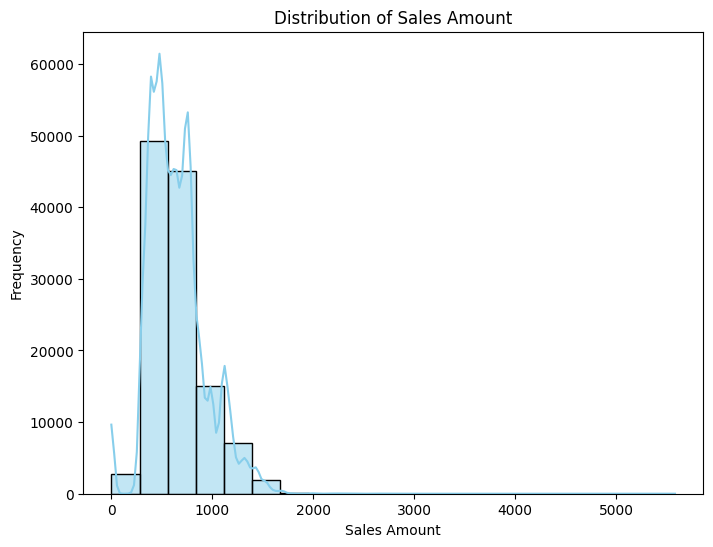

In [7]:
# Visualize the distribution of sales
plt.figure(figsize=(8, 6))
sns.histplot(df['Amount'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Sales Amount")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.show()

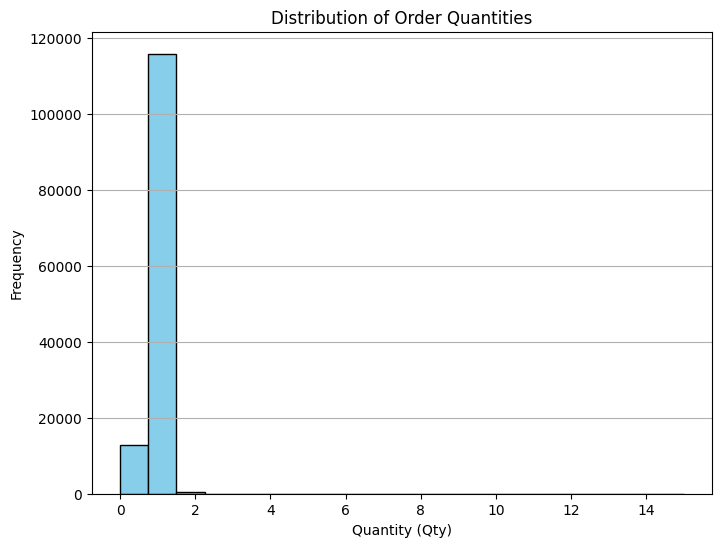

In [8]:
# Visualize the distribution of Quantity
plt.figure(figsize=(8, 6))
plt.hist(df['Qty'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Quantity (Qty)')
plt.ylabel('Frequency')
plt.title('Distribution of Order Quantities')
plt.grid(axis='y')
plt.show()

<ipython-input-9-4293466606bf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Status', palette='pastel')


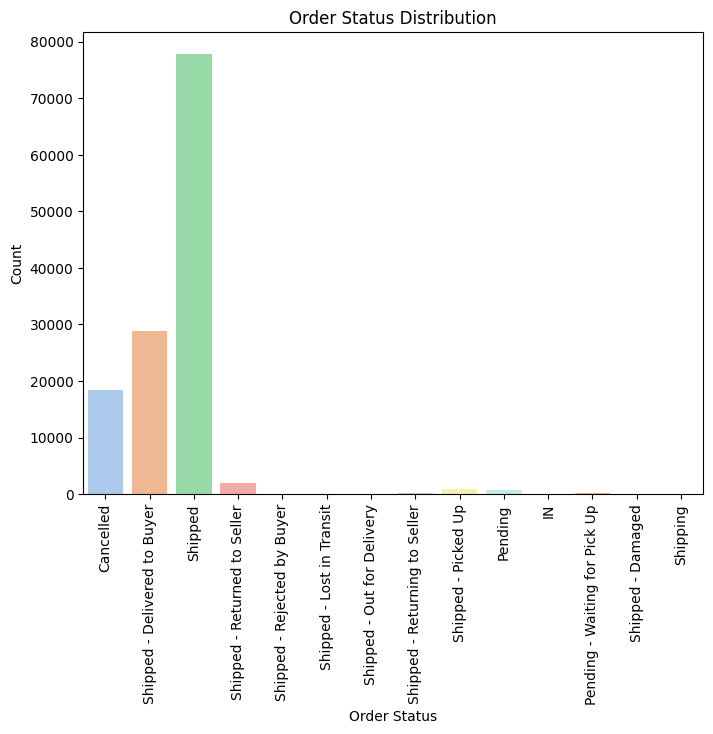

In [9]:
# Visualize the distribution of Status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Status', palette='pastel')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.title('Order Status Distribution')
plt.xticks(rotation=90)
plt.show()

# **Data Preprocessing**

**1. Handling Missing Values**

In [10]:
# Remove null values of index column first to convert because they cant be converted when they have null values
df.dropna(subset=['index'], inplace=True)

# Convert columns to specified data types
df['index'] = df['index'].astype(int)
df['Date'] = pd.to_datetime(df['Date'])


# Check the updated data types
print(df.dtypes)

index                          int64
Order ID                      object
Date                  datetime64[ns]
Status                        object
Fulfilment                    object
Sales Channel                 object
ship-service-level            object
Style                         object
SKU                           object
Category                      object
Size                          object
ASIN                          object
Courier Status                object
Qty                          float64
currency                      object
Amount                       float64
ship-city                     object
ship-state                    object
ship-postal-code             float64
ship-country                  object
promotion-ids                 object
B2B                           object
fulfilled-by                  object
Unnamed: 22                   object
dtype: object


<ipython-input-10-b454b848aad1>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [11]:
# Identify columns with missing values
columns_with_missing_values = df.columns[df.isnull().any()].tolist()

# Check the columns with missing values
print(columns_with_missing_values)

['Courier Status', 'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids', 'B2B', 'fulfilled-by', 'Unnamed: 22']


In [12]:
for col in columns_with_missing_values:
    # Impute missing values with the mean for numerical columns
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        df[col].fillna(df[col].mean(), inplace=True)
    # if the the column with the NAN value is courier status then it should be imputed with whatever in the status column of that row
    elif col == 'Courier Status':
        df['Courier Status'].fillna(df['Status'], inplace=True)
    else:
        # Handle categorical columns by mode imputation
        df[col].fillna(df[col].mode().iloc[0], inplace=True)

# Verify that missing values have been handled
print(df.isnull().sum())

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
promotion-ids         0
B2B                   0
fulfilled-by          0
Unnamed: 22           0
dtype: int64


**2. Data Type Conversion**

In [13]:
# Convert columns to specified data types
df['Qty'] = df['Qty'].astype(int)
df['ship-postal-code'] = df['ship-postal-code'].astype(int)

# drop the last column
df.drop(columns=['Unnamed: 22'], inplace=True)

# Check the updated data types
print(df.dtypes)

index                          int64
Order ID                      object
Date                  datetime64[ns]
Status                        object
Fulfilment                    object
Sales Channel                 object
ship-service-level            object
Style                         object
SKU                           object
Category                      object
Size                          object
ASIN                          object
Courier Status                object
Qty                            int64
currency                      object
Amount                       float64
ship-city                     object
ship-state                    object
ship-postal-code               int64
ship-country                  object
promotion-ids                 object
B2B                             bool
fulfilled-by                  object
dtype: object


**3. Outlier Detection and Treatment**

In [14]:
print(df.shape)

(128975, 23)


0         False
1         False
2         False
3         False
4         False
          ...  
128972    False
128973    False
128974    False
128975    False
128976    False
Length: 128975, dtype: bool
0         True
1         True
2         True
3         True
4         True
          ... 
128972    True
128973    True
128974    True
128975    True
128976    True
Length: 128975, dtype: bool
1220
(127755, 23)


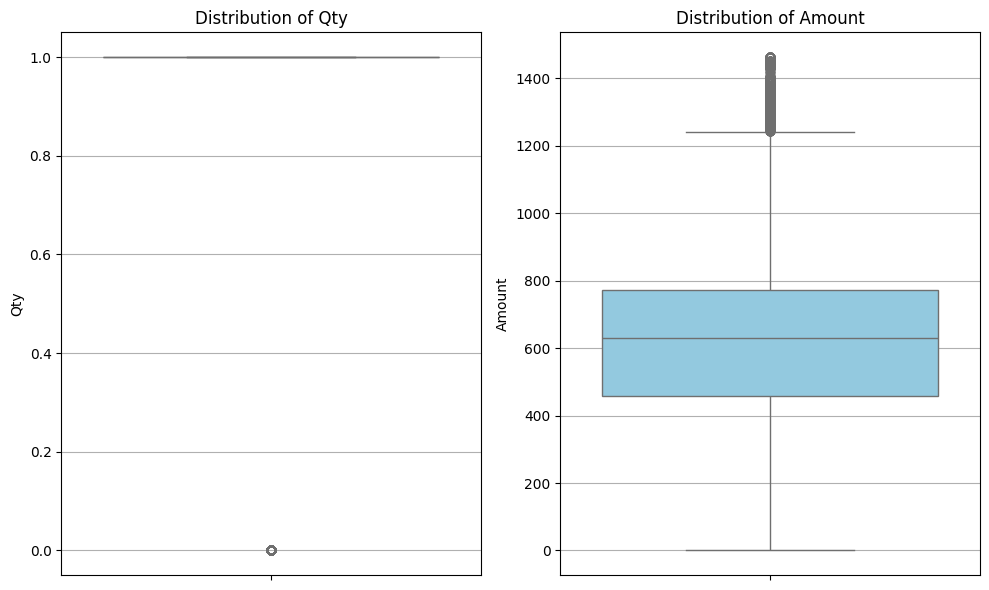

In [15]:
numerical_columns = ['Qty', 'Amount']

# Calculate z-scores for each numerical column
z_scores = pd.DataFrame()
for col in numerical_columns:
    z_scores[col] = (df[col] - df[col].mean()) / df[col].std()

# Set a threshold for outlier detection (e.g., z-score > 3 or < -3)
threshold = 3

# Identify outliers based on z-scores
outliers = (z_scores.abs() > threshold).any(axis=1)

# The rows that are false have no outlier
print(outliers)
print(~outliers)
print(outliers.sum())

# Remove rows that have outliers by negating the outliers condition where it selects all rows where the value of outliers is False, effectively excluding the outliers.
df = df[~outliers]

# Verify that outliers have been removed
print(df.shape)

# Visualize the distribution of quantity and amount columns
plt.figure(figsize=(10, 6))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.boxplot(data=df, y=col, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.grid(axis='y')
plt.tight_layout()
plt.show()

688
(127067, 23)


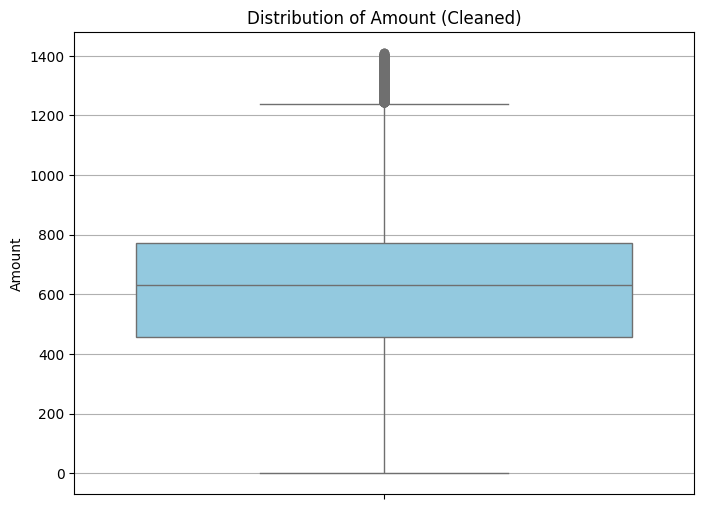

In [16]:
# Since there are still some outliers in the amount column, removing them is a must

# Recompute z-scores for the "Amount" column
z_scores_amount = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()

# Set a threshold for outlier detection (e.g., z-score > 3 or < -3)
threshold_amount = 3

# Identify outliers based on updated z-scores
outliers_amount = (z_scores_amount.abs() > threshold_amount)

# Remove rows with outliers in the "Amount" column
df = df[~outliers_amount]

# Verify that remaining outliers have been removed
print(outliers_amount.sum())
print(df.shape)


# Visualize the distribution of the "Amount" column (after removing remaining outliers)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Amount', color='skyblue')
plt.title("Distribution of Amount (Cleaned)")
plt.ylabel("Amount")
plt.grid(axis='y')
plt.show()

# **Data Visualization**


**1. Using Matplotlib and Seaborn**

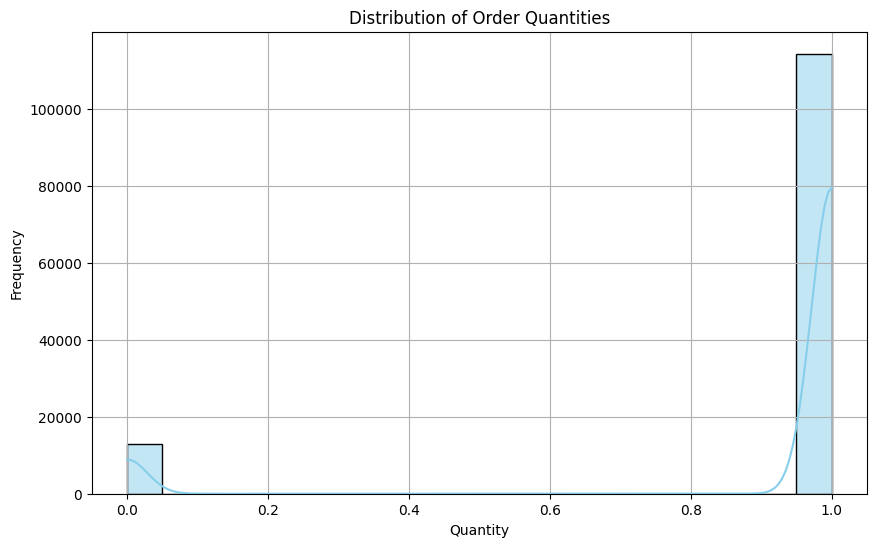

In [17]:
# Visualize the distribution of quantity
plt.figure(figsize=(10, 6))
sns.histplot(df['Qty'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Order Quantities")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.grid()
plt.show()

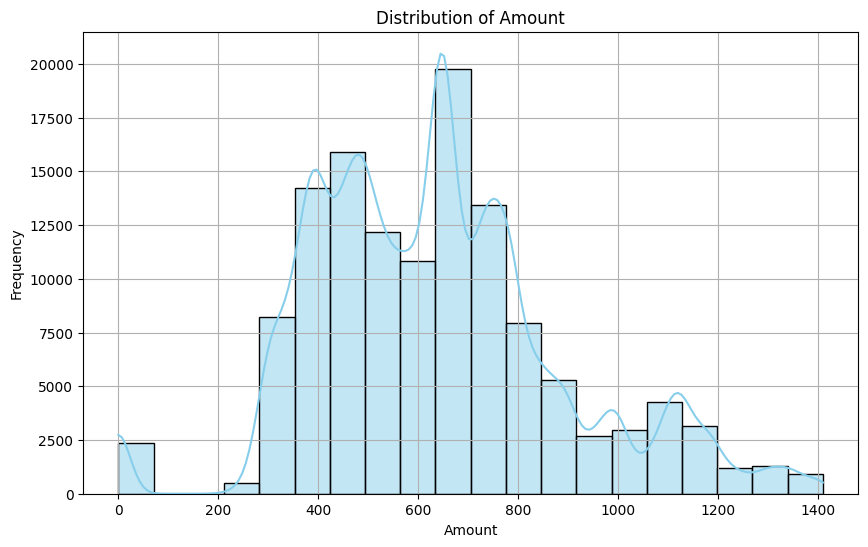

In [18]:
# Visualize the distribution of sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Amount")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.grid()
plt.show()

<ipython-input-19-0bd79ec10f67>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', palette='Set3')


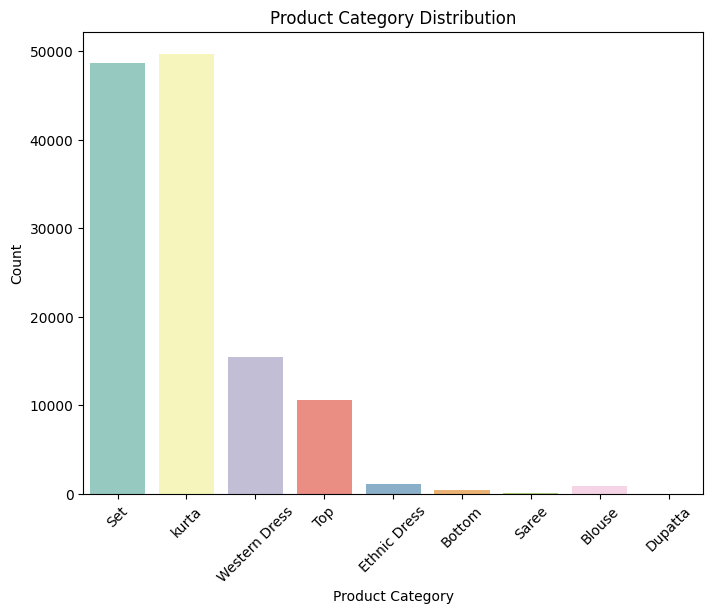

In [19]:
# Visualizing the distribution of product category
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Category', palette='Set3')
plt.title("Product Category Distribution")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

**2. Visual Analysis**

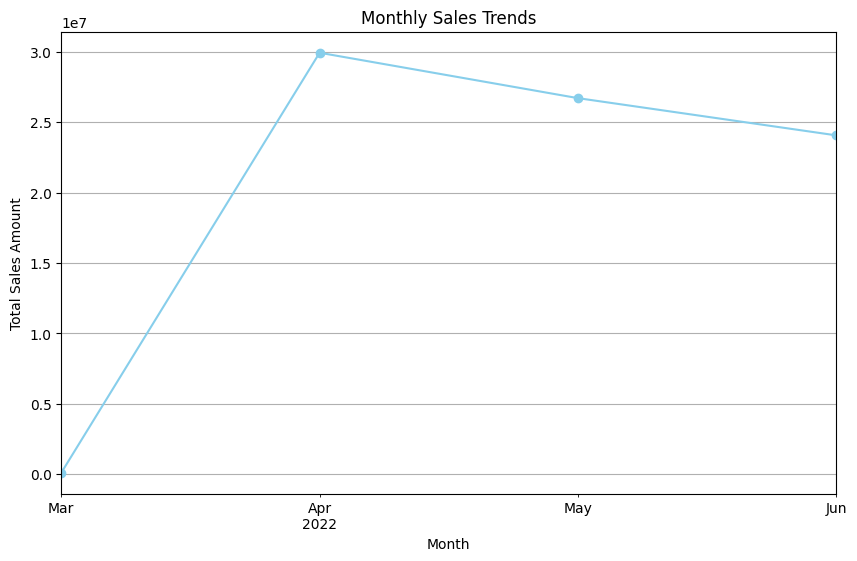

In [20]:
# Visualizing Sales Trends Over Time (Monthly Sales Trends)
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum()

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='skyblue')
plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Total Sales Amount")
plt.grid()
plt.show()

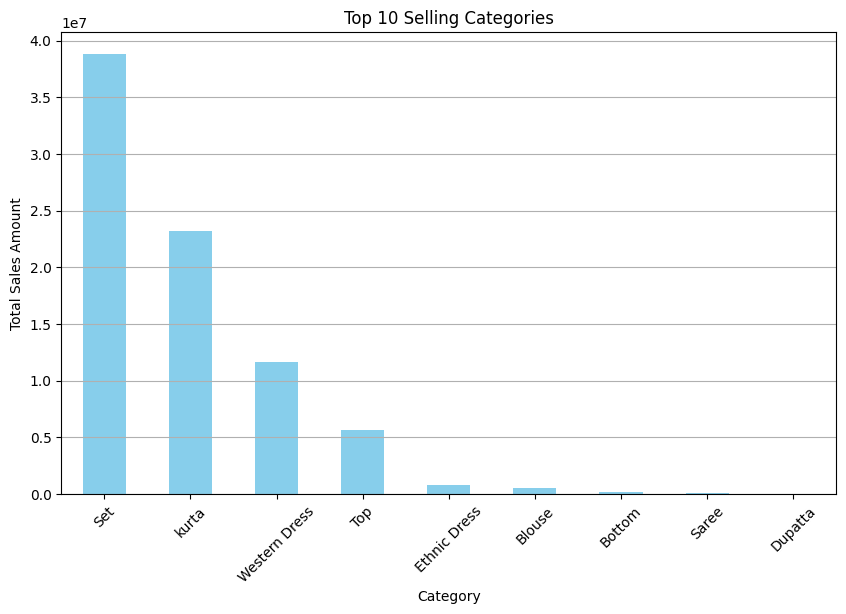

In [21]:
# Top-Selling product categories
top_selling_categories = df.groupby('Category')['Amount'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
top_selling_categories.plot(kind='bar', color='skyblue')
plt.title("Top 10 Selling Categories")
plt.xlabel("Category")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

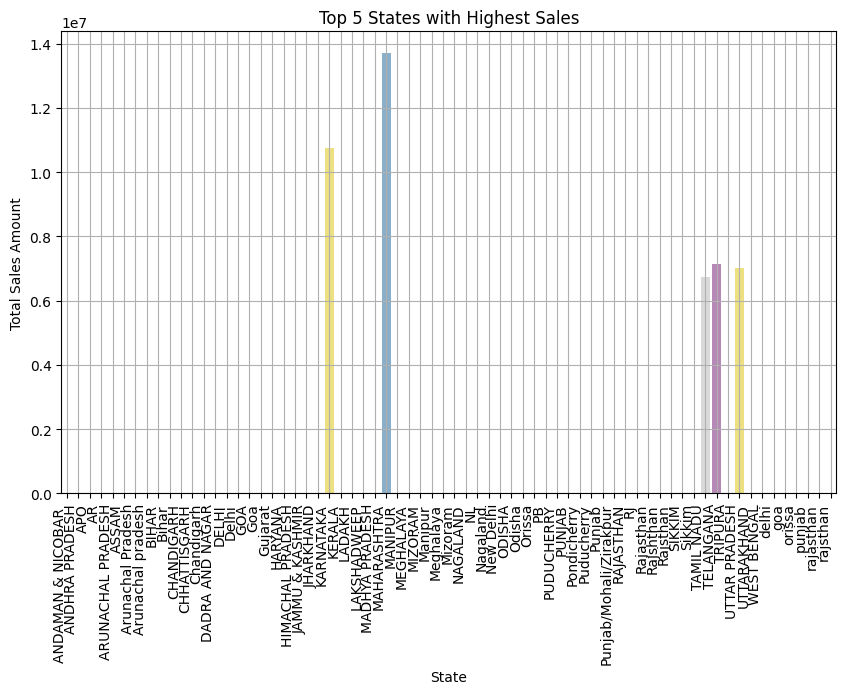

In [63]:
# Group the data by 'ship-state' and calculate the total sales
sales_by_state = df.groupby('ship-state')['Amount'].sum()

# Sort the data by total sales in descending order
sales_by_state = sales_by_state.sort_values(ascending=False)

# Get the top 5 states with the highest sales (sorted)
top_5_states = sales_by_state.sort_values(ascending=False).head(5)

# Create a bar chart to visualize the regional sales distribution (top 5 states)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_states.index, y=top_5_states.values, palette='Set3')
plt.title('Top 5 States with Highest Sales')
plt.xlabel('State')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.grid()
plt.show()

In [ ]:
import geopandas as gpd
from geopy.geocoders import Photon
from mpl_toolkits.basemap import Basemap

# Geocode region names using Photon
geolocator = Photon(user_agent="sales_dashboard")
df[['lat', 'long']] = df['ship-state'].apply(geolocator.geocode).apply(lambda loc: pd.Series([loc.latitude, loc.longitude]))

# Set up the map (adjust boundaries as needed)
m = Basemap(llcrnrlon=60, llcrnrlat=-15, urcrnrlon=155, urcrnrlat=40)

# Plot the data points
plt.figure(figsize=(10, 8))
m.drawcoastlines()
m.drawcountries()
m.scatter(df['long'], df['lat'], c=df['Amount'], cmap='coolwarm', s=df['Qty'] * 5, alpha=0.75)

# Add colorbar
plt.colorbar(label="Amount")

plt.title("Regional Sales Distribution")
plt.show()


# Predictive Modeling

**1. Building Predictive Models**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import warnings
warnings.filterwarnings("ignore")

# Feature selection
X = df[['Sales Channel ', 'ship-service-level', 'Category', 'Size', 'Qty', 'Amount']]
y = df['Status']

# Convert categorical features to numerical using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
LR = LogisticRegression()
LR.fit(X_train, y_train)

# Make predictions
y_pred_LR = LR.predict(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings("ignore")

# Initialize and train the decision tree classifier
DT = DecisionTreeClassifier(max_depth=5)
DT.fit(X_train, y_train)

# Make predictions
y_pred_DT = DT.predict(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

# Initialize and train the random forest classifier
RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(X_train, y_train)

# Make predictions
y_pred_RF = RF.predict(X_test)

**2. Model Evaluation**

In [26]:
warnings.filterwarnings("ignore")

# Evaluate model performance
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_LR))
print("Precision:", precision_score(y_test, y_pred_LR, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_LR, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_LR, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_LR))

print("Decision Tree Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_DT))
print("Precision:", precision_score(y_test, y_pred_DT, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_DT, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_DT, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_DT))

print("Random Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_RF))
print("Precision:", precision_score(y_test, y_pred_RF, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_RF, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_RF, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_RF))

Logistic Regression Metrics:
Accuracy: 0.8447705988825057
Precision: 0.839395014856485
Recall: 0.8447705988825057
F1-score: 0.7993046513719132

Classification Report:
                                precision    recall  f1-score   support

                    Cancelled       0.98      0.21      0.34      3691
                      Pending       0.00      0.00      0.00       132
Pending - Waiting for Pick Up       0.00      0.00      0.00        61
                      Shipped       0.89      0.99      0.94     15178
 Shipped - Delivered to Buyer       0.73      1.00      0.84      5725
    Shipped - Lost in Transit       0.00      0.00      0.00         2
   Shipped - Out for Delivery       0.00      0.00      0.00         8
          Shipped - Picked Up       0.00      0.00      0.00       198
  Shipped - Rejected by Buyer       0.00      0.00      0.00         1
 Shipped - Returned to Seller       0.00      0.00      0.00       392
Shipped - Returning to Seller       0.00      0.00

In [27]:
from sklearn.model_selection import cross_validate
warnings.filterwarnings("ignore")

# Perform cross-validation for each model
models = [LR, DT, RF]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']

for model, name in zip(models, model_names):
    scoring = ['precision_macro', 'recall_macro']
    scores = cross_validate(model, X_encoded, y, scoring=scoring, cv=5)
    print(f"{name} - Precision (macro):", scores['test_precision_macro'])
    print(f"{name} - Recall (macro):", scores['test_recall_macro'])
    print("\n")

Logistic Regression - Precision (macro): [0.21544585 0.21249172 0.21514244 0.19996011 0.21115908]
Logistic Regression - Recall (macro): [0.17306275 0.18631069 0.18386217 0.15620981 0.18312969]


Decision Tree - Precision (macro): [0.23345687 0.23269957 0.23368375 0.21426406 0.23263526]
Decision Tree - Recall (macro): [0.22589487 0.22122779 0.22589398 0.20437172 0.21972398]


Random Forest - Precision (macro): [0.29612783 0.22161091 0.32672764 0.30486313 0.23786561]
Random Forest - Recall (macro): [0.22754719 0.2035542  0.23994318 0.21803302 0.21803264]




# Dashboard Development


**1. Dashboard Design**

In [72]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

# Create a Dash application
app = dash.Dash(__name__)

# Define the app layout
app.layout = html.Div(children=[
    html.H1(children='Amazon Sales Dashboard'),

    # Sales Trends over Time
    dcc.Graph(
        id='sales-trend-graph',
        figure={
            'data': [
                {
                    'x': df['Date'],
                    'y': df['Amount'],
                    'type': 'line',
                    'name': 'Sales Amount'
                }
            ],
            'layout': {
                'title': 'Monthly Sales Trends'
            }
        }
    ),

    # Top-Selling Categories
    dcc.Graph(
        id='top-categories-graph',
        figure={
            'data': [
                {
                    'x': df.groupby('Category')['Amount'].sum().nlargest(10).index,
                    'y': df.groupby('Category')['Amount'].sum().nlargest(10).values,
                    'type': 'bar',
                    'name': 'Sales Amount'
                }
            ],
            'layout': {
                'title': 'Top 10 Selling Categories'
            }
        }
    ),

    # Regional Sales Distribution
    dcc.Graph(
        id='regional-sales-graph',
        figure={
            'data': [
                {
                    'text': df['ship-state'],
                    'type': 'scattergeo',
                    'marker': {
                        'size': df['Amount'] * 0.01,
                        'color': 'skyblue'
                    }
                }
            ],
            'layout': {
                'title': 'Regional Sales Distribution',
                'geo': {
                    'showframe': False,
                    'projection': {'type': 'natural earth'}
                }
            }
        }
    )
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

# Conclusion
The provided code demonstrates the implementation of a data analysis project for an Amazon sales dataset. It covers data exploration, cleaning, visualization, model building, and the creation of an interactive dashboard using Python libraries like pandas, matplotlib, seaborn, and Dash.

The code can be further expanded to incorporate additional features such as:

* Implementing interactive filtering and brushing across different visualizations.
* Adding drill-down capabilities to explore data at a more granular level.
* Integrating real-time data sources to keep the dashboard up-to-date.
* Providing options for data export and download.
* Enhancing the visual appeal and user experience of the dashboard with custom styling and theming.